# Page Rank Random Walk (Directed Graph)

Import libraries.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from random import choice

Draw directed graph with 10 nodes.

In [2]:
G=nx.DiGraph()   # Draw directed graph.
G.add_nodes_from([i for i in range(10)])      # Add ten nodes.

Add random edges.

In [3]:
def add_edges(G,p):
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r=random.random()
                if r<=p:
                    G.add_edge(i,j)
                else:
                    continue
    return G

Draw directed graph with 10 nodes and random edges.

C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


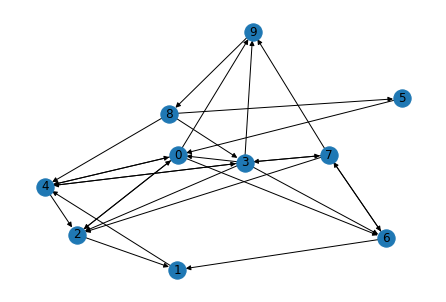

In [4]:
G=add_edges(G,0.3)  # Add vertices with probability less than equal to 0.3.
nx.draw(G,with_labels=True)   # Draw graph.
plt.show()

Make a random walk function.

In [5]:
def random_walk(G):
    nodes=G.nodes()
    print("Nodes: ",nodes)
    print("Node Type: ",type(nodes))
    RW_points=[0 for i in range(G.number_of_nodes())]          # Initialise random walk points as zero.
    r=random.choice(list(nodes))      # Select random node.
    print("r: ",r)
    RW_points[r] += 1                # Increase random walk points of corresponding node.
    out=G.out_edges(r)
    c=0
    while(c != 100000):           # 100000 iterations.
        if(len(out)==0):                          #Terminal node.
            focus=random.choice(list(r))          
        else:                                     # Not terminal node.
            r1=random.choice(list(out))
            focus=r1[1]
        RW_points[focus]+=1                      # Increase random walk point
        out=G.out_edges(focus)                   # Find outgoing edges.
        c+=1
    return RW_points

Perform Random Walk.

In [6]:
RW_points=random_walk(G)                    # Run function.
print("Random Walk Points: ",RW_points)

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Node Type:  <class 'networkx.classes.reportviews.NodeView'>
r:  7
Random Walk Points:  [17112, 10524, 13813, 10042, 18892, 2373, 7298, 5387, 7280, 7280]


Sort nodes by random walk points.

In [7]:
def get_nodes_sorted_by_points(RW_points):                   
    points_array=np.array(RW_points)                           
    nodes_sorted_by_points=np.argsort(-points_array)            # Sort nodes by random walk points.
    return nodes_sorted_by_points

Print new points and nodes after iteration.

In [8]:
print("New points: ", RW_points)
nodes_sorted_by_points=get_nodes_sorted_by_points(RW_points)            # Print new points.
print("Nodes sorted after some iteration: ",nodes_sorted_by_points)         # Print sorted nodes.

New points:  [17112, 10524, 13813, 10042, 18892, 2373, 7298, 5387, 7280, 7280]
Nodes sorted after some iteration:  [4 0 2 1 3 6 8 9 7 5]


Apply page rank random walk algorithm and sort the nodes according to the points. Compare both the outputs.

In [9]:
pr=nx.pagerank(G)            # Run inbuilt algorithm.
pr_sorted=sorted(pr.items(),key=lambda x:x[1], reverse=True)        # Sort nodes
print("Page rank: ",pr_sorted)       
pr_list=[] 
for i in pr_sorted:                     # Get sorted nodes.
    pr_list.append(i[0]) 
print("Sorted list: ",pr_list)          # Print sorted nodes.

Page rank:  [(4, 0.17315509896073783), (0, 0.16407841641456716), (2, 0.12627987288161122), (1, 0.10148718588098779), (3, 0.10008201215678067), (8, 0.08063657764127066), (6, 0.07721877077360441), (9, 0.07721877077360441), (7, 0.061996549558433894), (5, 0.03784674495840196)]
Sorted list:  [4, 0, 2, 1, 3, 8, 6, 9, 7, 5]
